# 1Ï£ºÏ∞® 3ÍµêÏãú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(EDA) Ïã§Ïäµ Í≥ºÏ†ú
### ÏïÑÎûò ÏÑ§Î™ÖÏùÑ ÏùΩÍ≥† ÏßàÎ¨∏Ïóê ÎãµÌï¥Ï£ºÏÑ∏Ïöî.   
#### Ìï¥Îãπ Í≥ºÏ†úÏóê ÎåÄÌïú Î∂ÄÎã¥ ÏóÜÏù¥ ÏïÑÎûò ÏΩîÎìúÏùò ÏàúÏÑúÎ•º Îî∞ÎùºÏôÄÏ£ºÏãúÎ©¥ÏÑú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ≥ºÏ†ïÏóê ÎåÄÌïú Í≥µÎ∂ÄÎ•º ÌïúÎã§Í≥† ÏÉùÍ∞ÅÌï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§‚òÄÔ∏è   
   
   ### üìçÏÑ∏ÏÖòÏùò Í≥ºÏ†úÎäî ÏïÑÎûòÏóê ÏûàÏäµÎãàÎã§. Ïã§ÏäµÏùÑ ÎßàÏπú ÌõÑ Ïã§ÏäµÏôÑÎ£åÌïòÏã† ÎÇ¥Ïö©ÏùÑ Í∏∞Î∞òÏúºÎ°ú Í≥ºÏ†úÎ•º ÏàòÌñâ ÌõÑ GitHubÏóê ÏóÖÎ°úÎìú Ìï¥Ï£ºÏÑ∏Ïöî!üìç



In [8]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Í≥ºÏ†úÎç∞Ïù¥ÌÑ∞_online_retail.csv")

# 1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
print("Í≤∞Ï∏°Ïπò Í∞úÏàò:\n", df.isnull().sum())
df.dropna(inplace=True)

# 2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
# IQR Î∞©ÏãùÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï†úÍ±∞
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

df = df[
    (df['Quantity'] >= Q1_quantity - 1.5 * IQR_quantity) & (df['Quantity'] <= Q3_quantity + 1.5 * IQR_quantity) &
    (df['UnitPrice'] >= Q1_unitprice - 1.5 * IQR_unitprice) & (df['UnitPrice'] <= Q3_unitprice + 1.5 * IQR_unitprice)
]

# 3. Total_Amount Ïó¥ ÏÉùÏÑ±
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
print("Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df.shape)

Í≤∞Ï∏°Ïπò Í∞úÏàò:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å. Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (10000, 9)


### 2. Í∏∞Ïà†ÌÜµÍ≥Ñ Î∞è EDA
#### ÏöîÍµ¨ÏÇ¨Ìï≠
1. `UnitPrice`ÏôÄ `Quantity`Ïùò Í∏∞Ïà†ÌÜµÍ≥Ñ(ÌèâÍ∑†, Ï§ëÏïôÍ∞í, ÌëúÏ§ÄÌé∏Ï∞®)Î•º Í≥ÑÏÇ∞ÌïòÏãúÏò§.
2. `Country`Î≥Ñ `Total_Amount`Ïùò Ìï©Í≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÎ•º Ï∂úÎ†•ÌïòÏãúÏò§.
3. Îã§Ïùå ÎÇ¥Ïö©ÏùÑ ÏãúÍ∞ÅÌôîÌïòÏãúÏò§:
   - `UnitPrice`Ïùò Î∂ÑÌè¨Î•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞.
   - `Country`Î≥Ñ `Total_Amount`Î•º ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌïòÍ∏∞.

Í∏∞Ïà†ÌÜµÍ≥Ñ:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä:
 Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284760
Name: Total_Amount, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


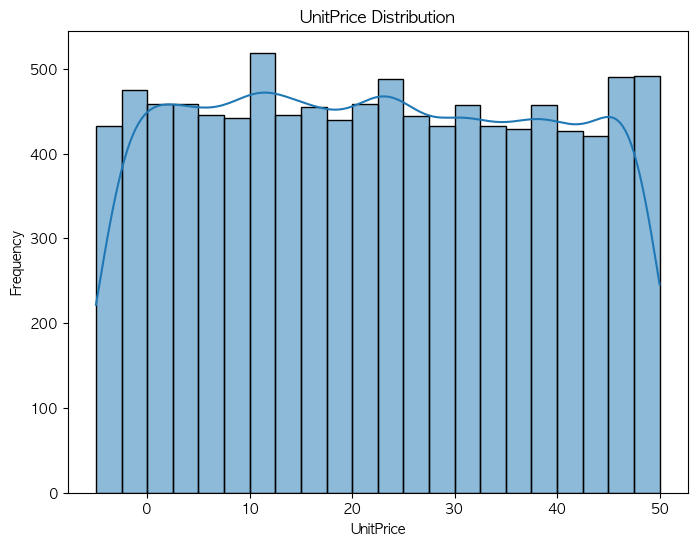

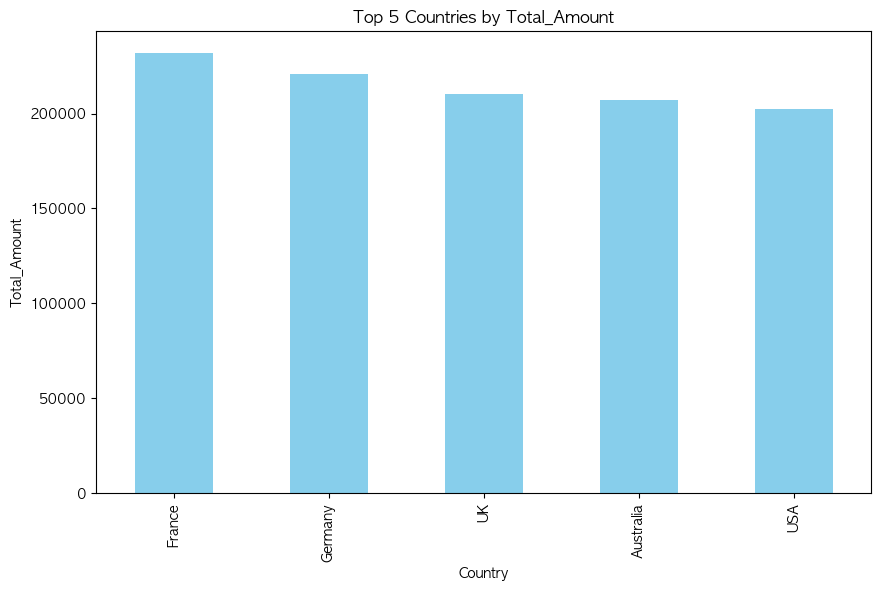

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Í∏∞Ïà†ÌÜµÍ≥Ñ
print("Í∏∞Ïà†ÌÜµÍ≥Ñ:\n", df[['UnitPrice', 'Quantity']].describe())

# 2. CountryÎ≥Ñ Total_Amount Ìï©Í≥Ñ
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5)
print("ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä:\n", country_sales)

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], kde=True)
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries by Total_Amount')
plt.xlabel('Country')
plt.ylabel('Total_Amount')
plt.show()

### 3. ÏÉÅÍ¥ÄÎ∂ÑÏÑù
#### ÏöîÍµ¨ÏÇ¨Ìï≠
1. `Quantity`ÏôÄ `Total_Amount` Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏãúÏò§:
   - Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÅÍ∞Å Í≥ÑÏÇ∞ÌïòÏãúÏò§.
2. ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÏãúÏò§:
   - Îëê Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌïúÏßÄ, ÏïΩÌïúÏßÄ, ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ ÏÑ§Î™ÖÌïòÏãúÏò§.

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò
pearson_corr, _ = pearsonr(df['Quantity'], df['Total_Amount'])

# Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò
spearman_corr, _ = spearmanr(df['Quantity'], df['Total_Amount'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.7764295146911522
Spearman Correlation: 0.8150877232931539


### 4. Feature Engineering
#### ÏöîÍµ¨ÏÇ¨Ìï≠
1. `InvoiceDate`ÏóêÏÑú Ïó∞ÎèÑÏôÄ ÏõîÏùÑ Ï∂îÏ∂úÌïòÏó¨ `Year`ÏôÄ `Month` Ïó¥ÏùÑ ÏÉùÏÑ±ÌïòÏãúÏò§.
2. ÏõîÎ≥Ñ `Total_Amount`Ïùò Ìï©Í≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÏãúÍ∞ÑÏóê Îî∞Î•∏ Ï∂îÏÑ∏Î•º ÏãúÍ∞ÅÌôîÌïòÏãúÏò§.

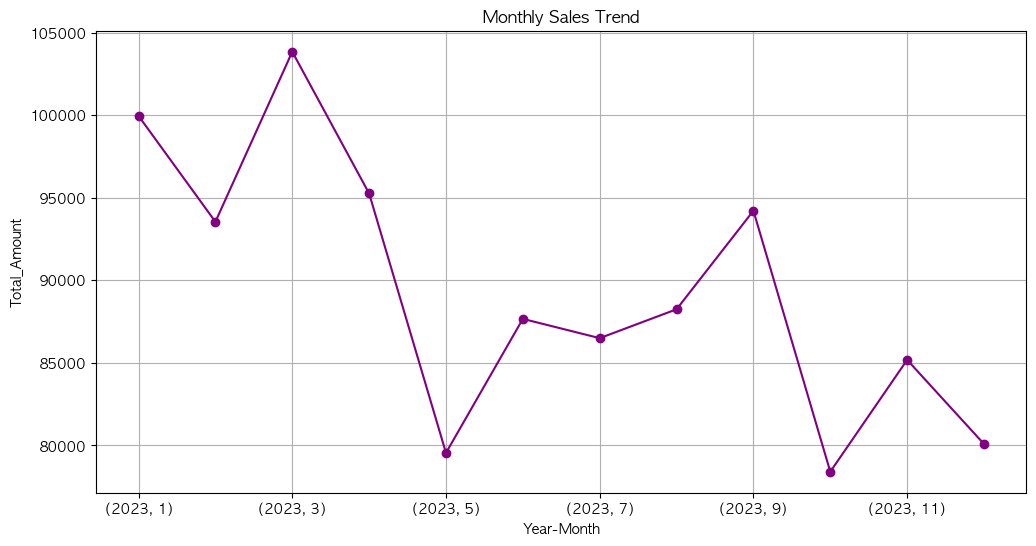

In [ ]:
# Ïó∞ÎèÑÏôÄ Ïõî Ï∂îÏ∂ú
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# ÏõîÎ≥Ñ Total_Amount Ìï©Í≥Ñ
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total_Amount')
plt.grid()
plt.show()

### 5. ÌöåÍ∑ÄÎ∂ÑÏÑù Î∞è ÌöåÍ∑ÄÏßÑÎã®
#### ÏöîÍµ¨ÏÇ¨Ìï≠
1. `Quantity`Î•º ÎèÖÎ¶ΩÎ≥ÄÏàò, `Total_Amount`Î•º Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÏãúÏò§.
2. ÌöåÍ∑Ä Í≥ÑÏàòÏôÄ \( R^2 \) Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÏãúÏò§.
3. ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ±ÏùÑ Q-Q PlotÏúºÎ°ú ÌôïÏù∏ÌïòÏãúÏò§.
4. ÏûîÏ∞®ÏôÄ ÏòàÏ∏°Í∞í Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏÇ∞Ï†êÎèÑÎ°ú ÎÇòÌÉÄÎÇ¥Í≥†, Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÏãúÏò§.

Coefficient: 22.299071797558316
Intercept: 2.863978418426626
R^2 Score: 0.6028427912835151


<Figure size 800x600 with 0 Axes>

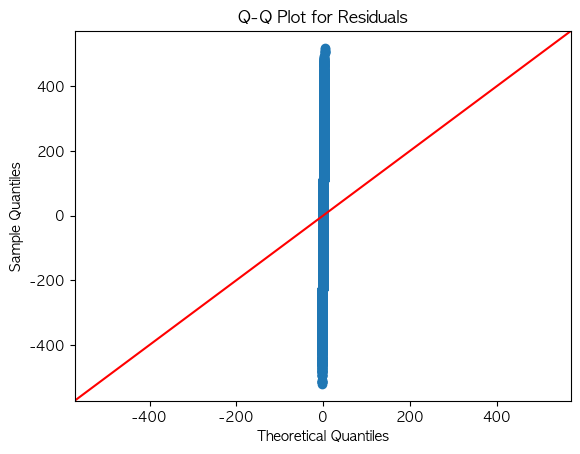

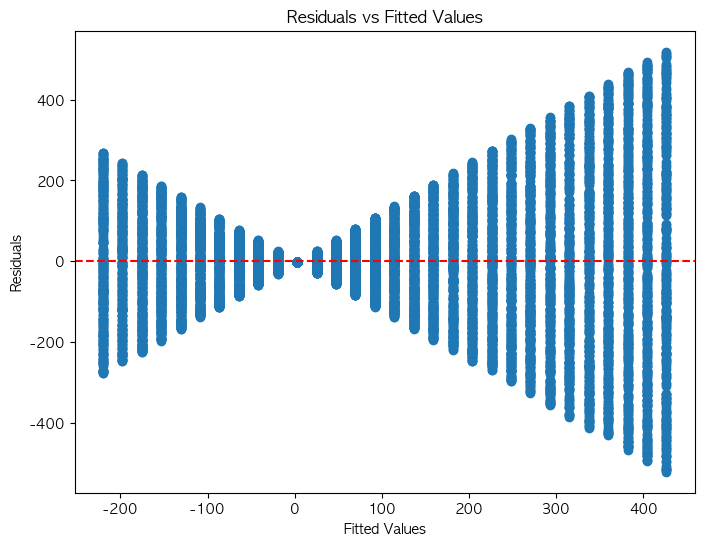

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# ÌöåÍ∑Ä Î∂ÑÏÑù
X = df[['Quantity']]
y = df['Total_Amount']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# ÌöåÍ∑Ä Í≥ÑÏàò Î∞è R^2
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2 Score: {r2_score(y, y_pred)}")

# ÏûîÏ∞® Î∂ÑÏÑù
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot for Residuals')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

__________
# Ïù¥Ï†ú Í≥ºÏ†ú ÏãúÏûë!

### 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
#### ÏöîÍµ¨ÏÇ¨Ìï≠
- Ï£ºÏñ¥ÏßÑ `online_retail.csv` ÌååÏùºÏùÑ Î∂àÎü¨Ïò§ÏÑ∏Ïöî.
- Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏ÌïòÍ≥†, Ïª¨Îüº Ï†ïÎ≥¥Î•º Ï∂úÎ†•ÌïòÏÑ∏Ïöî.

In [9]:
# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
import pandas as pd
df = pd.read_csv('Í≥ºÏ†úÎç∞Ïù¥ÌÑ∞_online_retail.csv')

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
#(ÏÉÅÏúÑ 20Í∞ú Ìñâ Ï∂úÎ†•)
print(df.head(20))
print(df.info())
# TODO: Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÎã® Î™á Í∞ú ÌñâÏùÑ Ï∂úÎ†•ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

   InvoiceNo StockCode Description  Quantity InvoiceDate  UnitPrice  \
0     I07271      S089  Product 67        12  2023-09-20  17.305292   
1     I00861      S095   Product 4        12  2023-05-31  34.734999   
2     I05391      S041  Product 96        -6  2023-07-31  36.367197   
3     I05192      S081   Product 1        -8  2023-07-11  34.778332   
4     I05735      S047  Product 34        18  2023-08-31  11.037961   
5     I06266      S094   Product 9         4  2023-04-08  29.981735   
6     I00467      S054  Product 63        12  2023-01-29  13.619049   
7     I04427      S055  Product 76        -6  2023-07-08  40.881023   
8     I05579      S095  Product 10        11  2023-06-21  -1.968611   
9     I08323      S019  Product 10        -8  2023-07-16  -2.925359   
10    I01686      S062  Product 50        -5  2023-06-04   0.593963   
11    I00770      S099  Product 44        12  2023-05-20   6.129976   
12    I06950      S093  Product 48         3  2023-10-20  -2.930055   
13    

### 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
#### ÏöîÍµ¨ÏÇ¨Ìï≠
1. Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÏãúÏò§.
2. Ïù¥ÏÉÅÏπòÎ•º ÌÉêÏßÄÌïòÍ≥† Ï†úÍ±∞ÌïòÏãúÏò§:
   - `Quantity`ÏôÄ `UnitPrice`ÏóêÏÑú IQR Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
3. ÏÉàÎ°úÏö¥ Ïó¥ `Total_Amount`Î•º Ï∂îÍ∞ÄÌïòÏãúÏò§:
   - `Total_Amount = Quantity √ó UnitPrice`

In [10]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# TODO: Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏ÌïòÍ≥† Ï†úÍ±∞ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

print("Í≤∞Ï∏°Ïπò Í∞úÏàò:\n", df.isnull().sum()) # Í≤∞Ï∏°Ïπò Ïú†Î¨¥ ÌåêÎã®
df.dropna(inplace=True) # Í≤∞Ï∏°Ïπò Ï†úÍ±∞Î∂ÄÎ∂ÄÎ∂Ñ

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
# IQR Î∞©ÏãùÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï†úÍ±∞
Q1_quantity = df['Quantity'].quantile(0.25) # 1ÏÇ¨Î∂ÑÎ©¥
Q3_quantity = df['Quantity'].quantile(0.75) # 3ÏÇ¨Î∂ÑÎ©¥
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

df = df[
    (df['Quantity'] >= Q1_quantity - 1.5 * IQR_quantity) & (df['Quantity'] <= Q3_quantity + 1.5 * IQR_quantity) &
    (df['UnitPrice'] >= Q1_unitprice - 1.5 * IQR_unitprice) & (df['UnitPrice'] <= Q3_unitprice + 1.5 * IQR_unitprice)
]
# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
# TODO: QuantityÏôÄ UnitPrice Î≥ÄÏàòÏóê ÎåÄÌïú IQRÏùÑ Ï∂úÎ†•ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎìúÏÑ∏Ïöî(e. def iqr(Î≥ÄÏàòÎ™Ö))
# TODO: QuantityÏôÄ UnitPrice Î≥ÄÏàòÎ•º Ï†úÏûëÌïú Ìï®ÏàòÏóê ÎÑ£Ïñ¥ Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÏÑ∏Ïöî.


# Total_Amount Ïó¥ ÏÉùÏÑ±
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

Í≤∞Ï∏°Ïπò Í∞úÏàò:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### 3. Í∏∞Ïà†ÌÜµÍ≥Ñ Î∞è EDA
#### ÏöîÍµ¨ÏÇ¨Ìï≠
1. `UnitPrice`ÏôÄ `Quantity`Ïùò Í∏∞Ïà†ÌÜµÍ≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÏãúÏò§.
2. `Country`Î≥Ñ `Total_Amount`Ïùò Ìï©Í≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÎ•º Ï∂úÎ†•ÌïòÏãúÏò§.
3. Îã§Ïùå ÎÇ¥Ïö©ÏùÑ ÏãúÍ∞ÅÌôîÌïòÏãúÏò§:
   - `UnitPrice`Ïùò Î∂ÑÌè¨Î•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞.
   - `Country`Î≥Ñ `Total_Amount`Î•º ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌïòÍ∏∞.

Í∏∞Ïà†ÌÜµÍ≥Ñ:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä:
 Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284760
Name: Total_Amount, dtype: float64


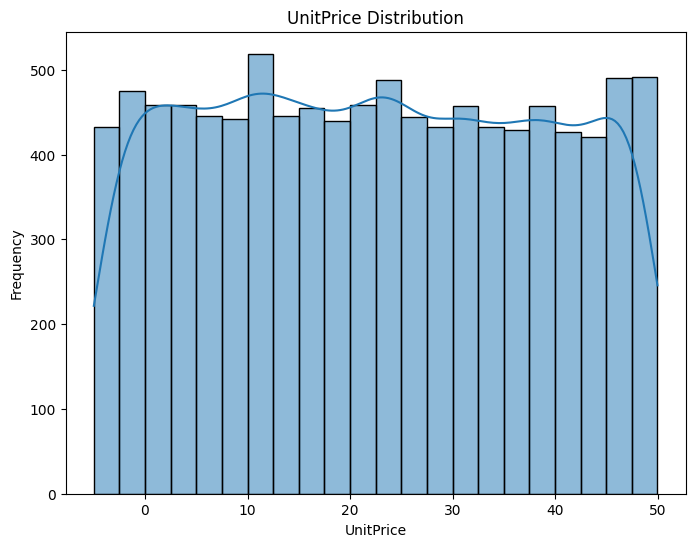

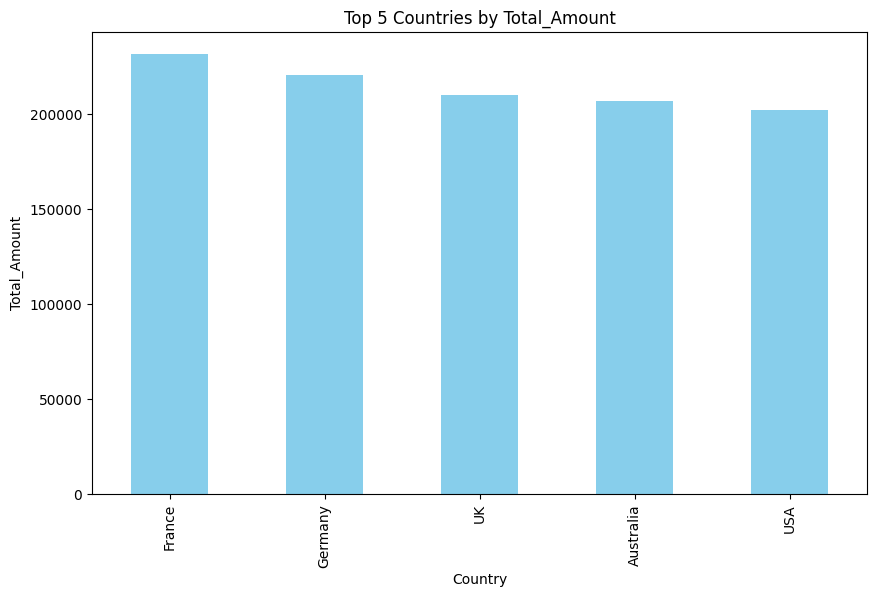

In [11]:
# Í∏∞Ïà†ÌÜµÍ≥Ñ
# TODO: UnitPriceÏôÄ QuantityÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.
import seaborn as sns
import matplotlib.pyplot as plt

print("Í∏∞Ïà†ÌÜµÍ≥Ñ:\n", df[['UnitPrice', 'Quantity']].describe())

# CountryÎ≥Ñ Total_Amount Ìï©Í≥Ñ
# TODO: CountryÎ≥Ñ Total_AmountÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÎ•º Ï∂úÎ†•ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5)
print("ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä:\n", country_sales)
# ÌûàÏä§ÌÜ†Í∑∏Îû®
# TODO: UnitPriceÏùò Î∂ÑÌè¨Î•º ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], kde=True)
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries by Total_Amount')
plt.xlabel('Country')
plt.ylabel('Total_Amount')
plt.show()